In [1]:
import matplotlib.pyplot as plt
import sys
import math
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')
from pyaxions import jaxions as pa
from pyaxions import spectools as sp
from pyaxions import spectrum as spe

This notebook describes the usage of functions in spectools.py and spectrum.py (version 001fe43 Fri Sep 3 2021).

# Preliminaries

First we extract the data of axion spectra and save them as pickle files, since accessing m files takes somewhat long time (particularly for simulations with huge grid sizes). Here we use the results of 8 sample simulations with the size of 512^3.

In [2]:
# path to m files
mpath = './simus'
mflist = []
for id in range(8):
    mf = pa.findmfiles(mpath+'/simu%02d/'%id)
    mflist.append(mf)

## class espevol

`espevol` extracts the axion energy spectrum and its time evolution.
```python
class espevol:
    def __init__(self, mfiles, spmasklabel='espK_0', cor='nocorrection'):
```
spmasklabel option specifies the data label. For example:  
`'espK_0'` kinetic energy spectrum (with LUT correction)  
`'espCK_0'` kinetic energy spectrum (without LUT correction)  
`'espCK_Red_1.50'` kinetic energy spectrum (without LUT correction) with top-hat mask from Gaussian cut and $r_{\rm mask}=1.50$  

Outputs (class members):  
- `sizeN` grid size  
- `sizeL` comoving box size  
- `msa` $m_s a$ (at the initial time)  
- `LL` lambda0  
- `nm` list of the number of modes  
- `avek` list of comoving wavenumber  
- `k_below` mask to identify modes less than N/2
- `ttab` table for conformal time
- `logtab` table for $\log(m_s/H)$
- `esp` energy spectrum, defined as
\begin{align}
{\tt esp}(k) = \frac{1}{2}\frac{R^2}{L^3}|\theta_{\tau}(k)|^2 = \frac{1}{2L^3}\frac{R^4}{R_1^2H_1^2}|\dot{\theta}(k)|^2.
\end{align}
Here we use a rescaled conformal time defined as
\begin{align}
Rd\tau = R_1H_1dt,
\end{align}
which is related to the conventional conformal time ($Rd\eta = dt$) as $\tau = R_1H_1\eta$.  
${\tt esp}$ is an array with the shape esp[t][k], where t is the time index and k is the index for momenta (ttab[t] and logtab[t] show the corresponding values of time and log).

If we specify `cor='correction'` option, it also produces data of the spectrum multiplied by the PPSE correction matrix, which is stored as `espc`.

In [3]:
espt = sp.espevol(mflist[0])

built up to log = 5.64 [118/118]


<Figure size 432x288 with 0 Axes>

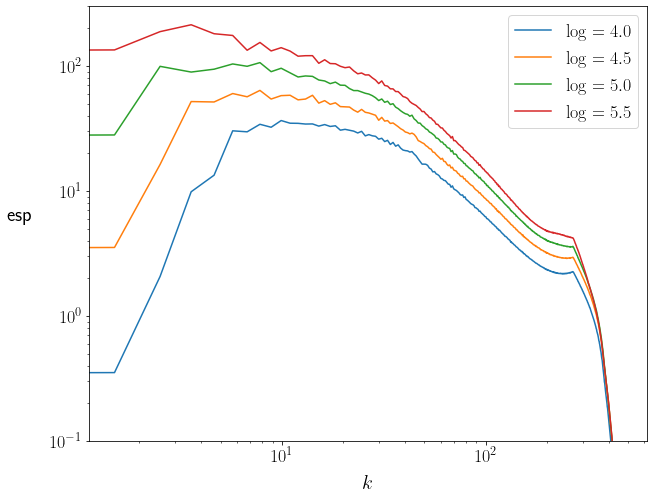

In [4]:
plt.clf()
plt.figure(figsize=(10,8))
logil = [4,4.5,5,5.5]
for log in logil:
    it = np.abs(espt.logtab - log).argmin()
    plt.plot(espt.avek,espt.esp[it][:],label=r'$\log = %.1f$'%espt.logtab[it])
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-1,3e+2)
plt.xlabel(r'$k$',fontsize=20,labelpad=10)
plt.ylabel(r'esp',fontsize=20,rotation=0,labelpad=30)
plt.tick_params(labelsize=18)
plt.legend(loc='upper right',fontsize=18)

## function saveesp
```python
def saveesp(espe, name='./esp', cor='nocorrection'):
```
This function saves `esp` (and `espc` if `cor='correction'`), `nm`, `avek`, `k_below`, `ttab`, and `logtab` data as pickle files. These files are named `name_something`, where something = esp, nm, k, k_below, t, log.

In [5]:
# This produces the following files (with id = 00, 01, ..., 07) in the directory ./espdata :
#
# id_esp.pickle
# id_k_below.pickle
# id_k.pickle
# id_log.pickle
# id_nm.pickle
# id_t.pickle
#
for id in range(8):
    esp = sp.espevol(mflist[id])
    sp.saveesp(esp,'./espdata/%02d'%id)

built up to log = 5.64 [118/118]
built up to log = 5.64 [118/118]
built up to log = 5.64 [118/118]
built up to log = 5.64 [118/118]
built up to log = 5.64 [118/118]
built up to log = 5.64 [118/118]
built up to log = 5.64 [118/118]
built up to log = 5.64 [118/118]


## class readP
```python
class readP:
    def __init__(self, name, cor='nocorrection'):
```
This reads the data of axion energy spectra and constructs the following quantity:
\begin{align}
P \equiv \frac{k}{(f_aH)^2}\frac{\partial\rho_a}{\partial k} = \frac{R_1^2H_1^2}{R^4H^2}\frac{k^3}{\pi^2}\frac{{\tt esp}(k)}{{\tt nm}(k)}.
\end{align}

Outputs (class members):  
- `nm` list of the number of modes  
- `k` list of comoving wavenumber  
- `k_below` mask to identify modes less than N/2
- `t` table for conformal time
- `log` table for $\log(m_s/H)$
- `esp` (kinetic) energy spectrum
- `P` $P$ defined above. This (as well as `esp`) is an array with the shape P[t][k], where t is the time index and k is the index for momenta (t[t] and log[t] show the corresponding values of time and log).

If we specify `cor='correction'` option, it also produces data of the spectrum multiplied by the PPSE correction matrix, which is stored as `Pc`.

In [3]:
# read the data of esp and produce a list of P for 8 realizations
Plist = []
for id in range(8):
    rp = sp.readP('./espdata/%02d'%id)
    Plist.append(rp)

<Figure size 432x288 with 0 Axes>

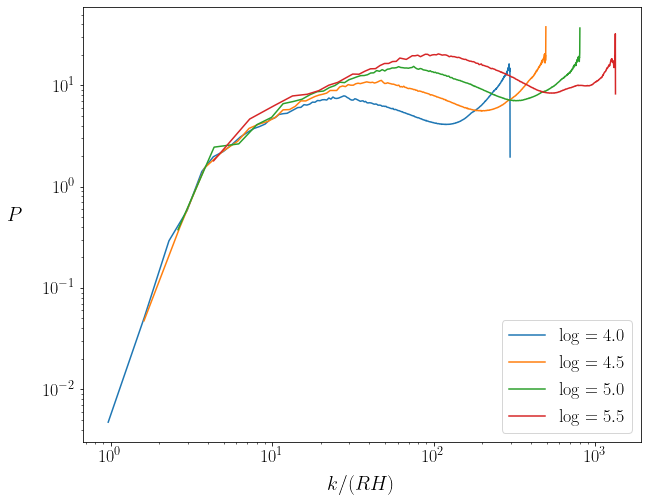

In [4]:
plt.clf()
plt.figure(figsize=(10,8))
id = 0
logil = [4,4.5,5,5.5]
for log in logil:
    it = np.abs(Plist[id].log - log).argmin()
    pp = Plist[id].P[it][1:]
    kk = Plist[id].k[1:]
    tt = Plist[id].t[it]
    plt.plot(kk*tt,pp,label=r'$\log = %.1f$'%Plist[id].log[it])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k/(RH)$',fontsize=20,labelpad=10)
plt.ylabel(r'$P$',fontsize=20,rotation=0,labelpad=30)
plt.tick_params(labelsize=18)
plt.legend(loc='lower right',fontsize=18)

A remarkable feature is that it shows an universal behavior for the evolution of the modes outside the horizon.
This will be used to calculate the instantaneous spectrum by performing the analytical fit.

<Figure size 432x288 with 0 Axes>

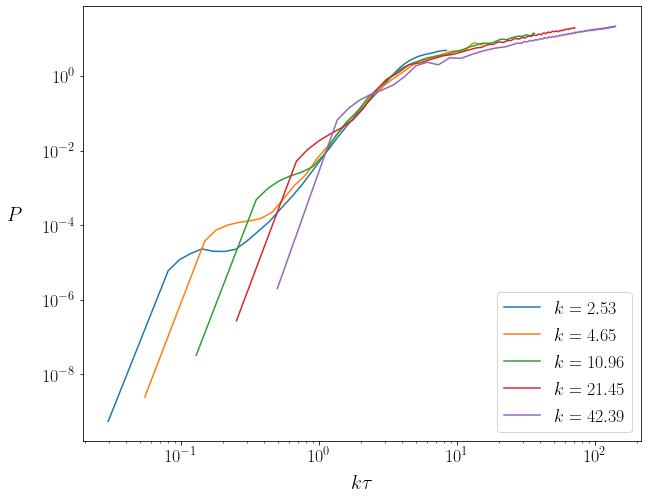

In [5]:
id = 0

plt.clf()
plt.figure(figsize=(10,8))

for ik in [2,4,10,20,40]:
    plt.plot(Plist[id].k[ik]*Plist[id].t,Plist[id].P[:,ik],label=r'$k=%.2f$'%Plist[id].k[ik])
plt.xlabel(r'$k\tau$',fontsize=20,labelpad=10)
plt.ylabel(r'$P$',fontsize=20,rotation=0,labelpad=30)
plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=18)
plt.legend(loc='lower right',fontsize=18)

<font color='red'>
If one prepares a data set that has the same structure as readP, in principle one can use the following functions without any modification.
</font>

# Instantaneous spectrum

The instantaneous spectrum is defined as
\begin{align}
F\left(\frac{k}{RH},\frac{m_s}{H}\right) = \frac{A}{R^3}\frac{\partial}{\partial t}\left(R^4\frac{\partial\rho_a}{\partial k}\right),
\end{align}
where $A=H/\Gamma$ is the normalization factor, which is determined by the condition
\begin{align}
\int dx F[x,y] = 1.
\end{align}
In terms of $P$ and $x = k\eta$, it can be written as
\begin{align}
F = A(f_aH)^2\frac{\partial P}{\partial x} = A(f_aH)^2\frac{\exp[f(\ell)]}{x}\frac{\partial f(\ell)}{\partial \ell},
\end{align}
where
\begin{align}
f(\ell) = \log P \quad \mathrm{and} \quad \ell = \log x.
\end{align}

## class fitP <font color='red'>[updated 2021.09.03]</font>
<font color='red'>The usage described here refers to the function implemented in spectrum.py rather than the old function in spectools.py.</font>

`fitP` fits some analytical functions to the data of $P$.  
```python
class fitP:
    def __init__(self, P, log, t, k, **kwargs):
```
Arguments:
- `P` data array of $P$
- `log` table for $\log(m_s/H)$
- `t` table for conformal time
- `k` list of comoving wavenumber

If necessary, the following options can be added:
- `p` order of the polynomial function (only supports p = 2,3,4,5; default p = 3; see below)
- `logstart` value of $\log(m_s/H)$ above which we perform the analytical fit (default logstart = 4)
- `verbose` option for progress messages (default verbose = 1)  
 1 : prints progress messages (overwriting the previous line)  
 2 : prints progress messages (not overwriting the previous line)  
 others : does not print progress messages
- `xh` default is xh = -1. If xh is some positive value, it switches to a simplified fit function when x[0] becomes larger than xh. If xh = -1 (or some negative value), it does not use this simplification.

Outputs (class members):
- `param` best fit parameters. This is an array with the shape a[ik][i], where ik is the index of a comoving momentum for which the fit is performed, and i is the index of the model parameters.
- `listfit` a boolean list with the shape listfit[ik], where ik is the index of a comoving momentum. It becomes False when the fit fails, and True when the fit successfully works at the corresponding momentum.
- `ikhistart` index ik at which an approximation for the fit function starts (see below)

`fitP` uses `scipy.optimize.curve_fit` to fit the following functions to data of $\log P$:

\begin{align}
f(\ell) = a_0 + a_1\ell - \log(1+(a_2 e^{\ell})^{a_3 + a_4\ell+\cdots +a_{3+p}\ell^p}),
\end{align}

where $\ell = \log x$. Note that these functions should be fitted to $\log P$ rather than $P$, and $P(x)$ should describe the time evolution of one mode (with $k$ fixed). In the code, they are defined as (togher with their derivatives with respect to $\ell$)
```python
def ftrend(lx, order, *args):
    ...
def dftrend(lx, order, *args):
    ...
```
where `lx` is $\ell$, `order` is the value of $p$, and the number of `*args` should be $p+3$. For example, `ftrend(lx, 3, a0, a1, a2, a3, a4, a5)` gives a function with $p=3$ and `dftrend(lx, 3, a0, a1, a2, a3, a4, a5)` gives its derivatives with respect to $\ell$.

The class `fitP` iteratively performes the analytical fit for every mode $k$ and stores the best fit values of $\{a_i\}$ as a class member `param`. It is an array with the shape a[ik][i], where ik is the index of a comoving momentum for which the fit is performed, and i is the index of the model parameters $\{a_i\}$.  

For sufficiently large values of $x$, the above function can be approximated by

\begin{align}
f_a(\ell) = a_0' + a_1'\ell + \cdots + a_p'\ell^p.
\end{align}

One can accerelate the fit procedure by using this approximation. If some positive value of `xh` is provided, `fitP` switches to use the approximated function for modes satisfying x[0] > xh. Note that this may create a discontinuity at around $k \simeq $ xh$/\tau_{\rm start}$ (where $\tau_{\rm start}$ corresponds to the conformal time specified by `logstart`), and hence one has to choose a sufficiently high value of xh (or simply set xh < 0 (default)) so that it does not affect the measurement of relevant quantities such as $F$ and $q$. The index ik at which the approximation starts is stored as a class member `ikhistart`.  

In the code, the approximated functions and their derivatives with respect to $\ell$ are defined as
```python
def ftrenda(lx, order, *args):
    ...
def dftrenda(lx, order, *args):
    ...
```
where the number of `*args` should be $p+1$, which is not the same as the full function ($p+3$).  

In case the fit procedure does not work and fails to find the parameters $\{a_i\}$
for some reason (unusual behavior of the data, etc.), such information is stored in a class member `listfit`.
It is a boolean array with the shape a[ik], where ik is the index of a comoving momentum, and becomes False
when the fit fails at the corresponding momentum. Such a bin will not be used for the calculation of the instantaneous spectrum.

In [6]:
# perform analytical fit of P for a single realization (id = 00)
id = 0
fp = spe.fitP(Plist[id].P,Plist[id].log,Plist[id].t,Plist[id].k,p=2)

fit P:  k = 464.33 [444/444]


Text(0.5, 1.0, '$k = 4.65$')

<Figure size 432x288 with 0 Axes>

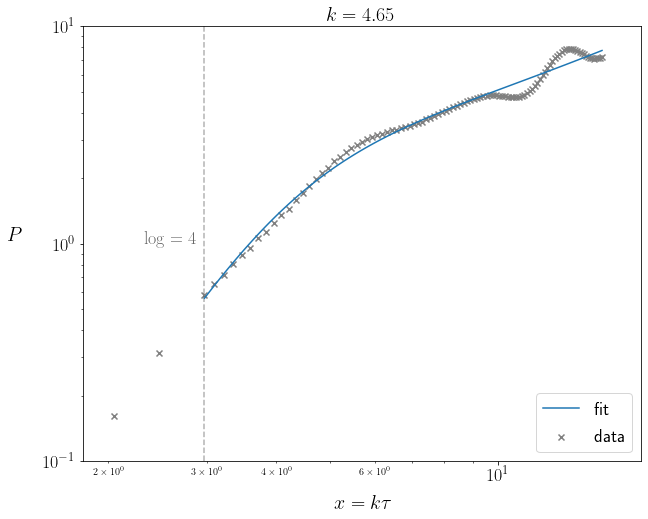

In [8]:
plt.clf()
plt.figure(figsize=(10,8))

id = 0
ik = 4

xdata = Plist[id].k[ik]*Plist[id].t
ydata = Plist[id].P[:,ik]

plt.scatter(xdata,ydata,marker='x',color='gray',label='data')

it4 = np.abs(Plist[id].log - 4.).argmin() # time index corresponding to log = 4

xx = np.exp(np.linspace(math.log(xdata[it4]),math.log(xdata[-1]),100))
pp = fp.param[ik]
plt.plot(xx,np.exp(spe.ftrend(np.log(xx),2,*pp)),label='fit')

plt.xlim([1.8,18])
plt.ylim([1e-1,1e+1])

plt.vlines(xdata[it4],plt.ylim()[0],plt.ylim()[1],linestyle='dashed',alpha=0.3)
plt.text(xdata[it4]*0.78,math.sqrt(plt.ylim()[0]*plt.ylim()[1]),'$\log = 4$',alpha=0.6,fontsize=18)

plt.xscale('log')
plt.yscale('log')
plt.tick_params(labelsize=18)
plt.legend(loc='lower right',fontsize=18)
plt.xlabel(r'$x = k\tau$',fontsize=20,labelpad=10)
plt.ylabel(r'$P$',fontsize=20,rotation=0,labelpad=30)
plt.title('$k = %.2f$'%Plist[id].k[ik],fontsize=20)

## function savePP, class readPP <font color='red'>[updated 2021.09.03]</font>
```python
def savePP(fP, name='./PP'):
    ...
class readPP:
    def __init__(self, name='./PP'):
    ...
```
Since it takes some time to perform the fit, one can use the function `savePP` to save the results of `fitP`.
It saves `param`, `listfit`, and `ikhistart` data as pickle files. These files are named `name_something`, where something = param, listfit, ikhistart.

In [15]:
# This produces the following files (with id = 00, 01, ..., 07) in the directory ./PPdata :
#
# id_ikhistart.pickle
# id_listfit.pickle
# id_param.pickle
#
for id in range(8):
    fp = spe.fitP(Plist[id].P,Plist[id].log,Plist[id].t,Plist[id].k,p=2)
    spe.savePP(fp,'./PPdata/%02d'%id)

fit P:  k = 464.33 [444/444]
fit P:  k = 464.33 [444/444]
fit P:  k = 464.33 [444/444]
fit P:  k = 464.33 [444/444]
fit P:  k = 464.33 [444/444]
fit P:  k = 464.33 [444/444]
fit P:  k = 464.33 [444/444]
fit P:  k = 464.33 [444/444]


One can import these files by using `readPP`:

In [9]:
# read the data of fit parameters and produce a list for 8 realizations
PPlist = []
for id in range(8):
    rpp = spe.readPP('./PPdata/%02d'%id)
    PPlist.append(rpp)

One can extract the results by using the same instance variables as `fitP`.

In [10]:
print(PPlist[0].param[4])
print(PPlist[0].listfit[4])

[-4.8277477   4.10291506  0.23181687  4.         -0.21920801]
True


## class calcF <font color='red'>[updated 2021.09.03]</font>
<font color='red'>The usage described here refers to the function implemented in spectrum.py rather than the old function in spectools.py.</font>

`calcF` computes the instantaneous spectrum by using the data of $P$.
```python
class calcF:
    def __init__(self, P, log, t, k, k_below, **kwargs):
```

Arguments:
- `P` data array of $P$ (produced by readP function)
- `log` table for $\log(m_s/H)$
- `t` table for conformal time
- `k` list of comoving wavenumber  
- `k_below` mask to identify modes less than N/2

If necessary, the following options can be added: 
- `usedata` if True, it uses the data of fit parameters obtained by `fitP`. The data can be loaded by adding `fitp = data` otpion, where `data` should be `fitP` or `readPP` class object. (defalt False)
- `p` order of the polynomial function for the fit (default 2)
- `sigma` sigma for the Gaussian filter (defalt 0.5)
- `xh` criterion to switch to a simplified fit function in `fitP` (defalt -1; relevant only when `usedata=False`)
- `logstart` value of $\log(m_s/H)$ above which we perform the analytical fit (default logstart = 4)
- `verbose` it does not print progress messages when verbose=False (default True)

Outputs (class members):  
- `F` $F$ defined above. This is an array with the shape F[t][x], where t is the time index and x is the index for momenta (t[t] Fnorm[t], and log[t] show the corresponding values of time, normalization factor, and log).
- `F_fit` $F$ computed by using the fit part only (not including the residue).
- `x` $x=k\tau$. This is an array with the shape F[t][x], where t is the time index and x is the index for momenta.
- `Fnorm` normalization factor $1/(Af_a^2H^2)=\Gamma/(f_a^2H^3)$ as a function of time (1 dim. array).
- `Fnorm_fit` normalization factor of $F$ computed by using the fit part only (not including the residue).
- `t` table for conformal time (1 dim. array).
- `log` table for $\log(m_s/H)$ (1 dim. array).  

`calcF` deals with comtaminations from axion oscillations in the following way. First, it uses `fitP` to fit a model function to data, and subtracts the fit to obrain residue:
\begin{align}
\mathcal{R} = P_{\rm data} - P_{\rm fit}.
\end{align}
Then it further subtracts a linear function,
\begin{align}
\bar{\mathcal{R}} = \mathcal{R} - (\alpha x + \beta)
\end{align}
such that $\bar{\mathcal{R}}(\tau_{\rm ini}) = \bar{\mathcal{R}}(\tau_{\rm fin}) = 0$.
Here $\tau_{\rm ini}$ and $\tau_{\rm fin}$ are the initial (corresponding to `logstart`) and final time of the data, respectively. After that, it applies discrete sine transform (DST) to $\bar{\mathcal{R}}$, multiplies Gaussian filter
\begin{align}
\exp\left[-\frac{(f/k)^2}{2\sigma^2}\right],
\end{align}
and performs inverse DST to obtain data $\bar{\mathcal{R}}_{\rm filtered}$ for which oscillations are smoothed out.
In the above equation, $f$ is the frequency of DST components, $k$ the comeving wavenumber of the mode, and $\sigma$ the parameter specified by the argument `sigma`. Finally, the function calculates the derivative analytically for $P_{\rm fit}$, while take a difference numerically for the residue:
\begin{align}
\frac{dP}{dx} = \frac{dP_{\rm fit}}{dx} + \alpha + \frac{d\bar{\mathcal{R}}_{\rm filtered}}{dx}.
\end{align}

For a check, `calcF` also stores the result obtained by using the fit part only (i.e. $dP/dx = dP_{\rm fit}/dx$) as `F_fit` and `Fnorm_fit`.

Since the fit procedure takes some time, it is recommended to perform `fitP` first, and load its result when we want to calculate $F$. The result of `fitP` can be loaded by adding `usedata=True` option and specifying the data by using `fitp = data` otpion, where `data` should be `fitP` or `readPP` class object. Note that one has to use the same value of `p` (order of the polynomial function) as `fitP`.

In [11]:
# compute F for a single realization (id = 00)
id = 0
Ft = spe.calcF(Plist[id].P,Plist[id].log,Plist[id].t,Plist[id].k,Plist[id].k_below,p=2,sigma=0.1,usedata=True,fitp=PPlist[id])

<Figure size 432x288 with 0 Axes>

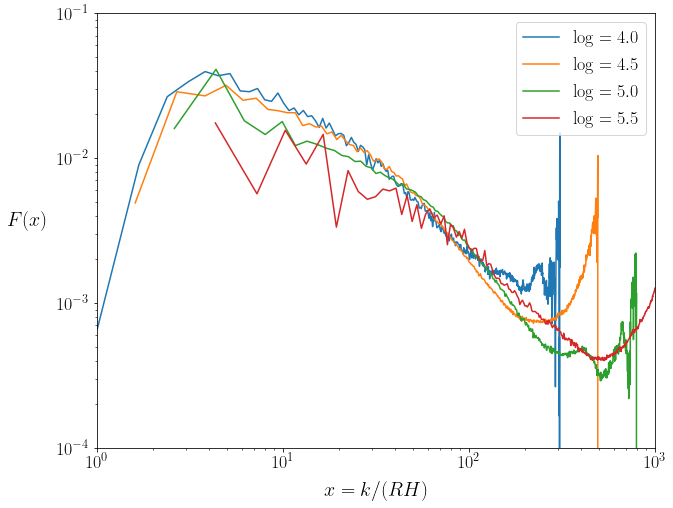

In [12]:
plt.clf()
plt.figure(figsize=(10,8))
cmap = plt.get_cmap("tab10")
logil = [4,4.5,5,5.5]
for log in logil:
    it = np.abs(Ft.log - log).argmin()
    xx = Ft.x[it]
    ff = Ft.F[it]
    plt.plot(xx,ff,label='$\log = %.1f$'%Ft.log[it])
plt.xscale('log')
plt.yscale('log')
plt.xlim(1,1000)
plt.ylim(1e-4,1e-1)
plt.xlabel(r'$x = k/(RH)$',fontsize=20,labelpad=10)
plt.ylabel(r'$F(x)$',fontsize=20,rotation=0,labelpad=30)
plt.tick_params(labelsize=18)
plt.legend(loc='upper right',fontsize=18)

Unfortunately, for simulations with $512^3$ the mode evolution becomes quite noisy at high $k$, which results in a significant discrepancy between `F` and `F_fit`. In order to alleviate it, one has to perform simulations with larger box sizes. Alternatively, one could set a smaller value of `sigma` (here `sigma` = 0.1 is used), but such a choice would bias the result.

Text(0.5, 1.0, '$\\log = 4.509962$')

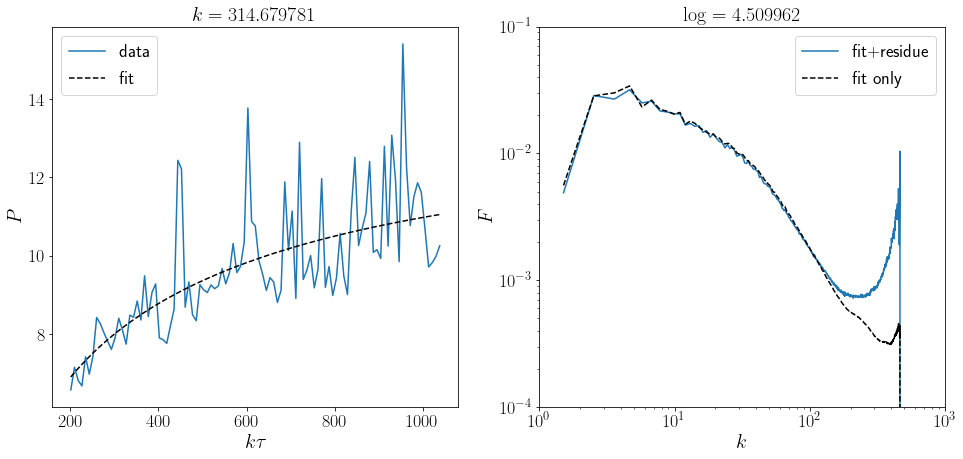

In [13]:
id = 0
ik = 300
fig, ax = plt.subplots(1,2,figsize=(16,7))

il4 = np.abs(Plist[id].log - 4.).argmin()
w = Plist[id].k[ik]*Plist[id].t[il4:]
data = Plist[id].P[il4:,ik]
pa = PPlist[id].param[ik]
fit = np.exp(spe.ftrend(np.log(w),2,*pa))

ax[0].plot(w,data,'C0',label='data')
ax[0].plot(w,fit,"k--",label='fit')
ax[0].set_ylabel(r'$P$',fontsize=20)
ax[0].set_xlabel(r'$k\tau$',fontsize=20)
ax[0].legend(fontsize=18)
ax[0].tick_params(labelsize=18)
ax[0].set_title(r'$k = %f$'%Plist[id].k[ik],fontsize=20)

it = np.abs(Ft.log - 4.5).argmin()
ax[1].plot(Ft.x[it]/Ft.t[it],Ft.F[it],label='fit+residue')
ax[1].plot(Ft.x[it]/Ft.t[it],Ft.F_fit[it],"k--",label='fit only')
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_xlim(1,1000)
ax[1].set_ylim(1e-4,1e-1)
ax[1].set_xlabel(r'$k$',fontsize=20)
ax[1].set_ylabel(r'$F$',fontsize=20)
ax[1].tick_params(labelsize=18)
ax[1].legend(fontsize=18)
ax[1].set_title(r'$\log = %f$'%Ft.log[it],fontsize=20)

# Spectral index

We estimate the spectral index $q$ based on the following $\chi^2$ function:
\begin{align}
\chi^2 = \sum_l \frac{(L_l - M_l)^2}{\sigma^2},
\end{align}
where
\begin{align}
L_l = \log F_l, \quad M_l = m -lq, \quad \mathrm{and} \quad l = \log x.
\end{align}
The model $M_l$ corresponds to $F = e^m/x^q$ described by two parameters, $m$ and $q$. 
We define $\sigma^2$ from the residuals of the different bins at the best fit model,
\begin{align}
\sigma^2 = \frac{1}{n_{\rm bins}}\sum_l(L_l - M_l(m_{\rm min},q_{\rm min}))^2
\end{align}
where $m_{\rm min}$ and $q_{\rm min}$ are the best fit values that minimize $\sum_l(L_l-M_l)^2$.
We only use the data points within a range defined by
\begin{align}
c_{\rm min}H < k/R < c_{\rm max} m_s,
\end{align}
where the coefficients $c_{\rm min}$ and $c_{\rm max}$ can be specified in the code.

## class scanq
`scanq` estimates $q$ at every time step by using the result of `calcF`.
```python
class scanq:
    def __init__(self, inspx, inspy, insplog, cxmin=50., cxmax=1/4., **kwargs):
```

Arguments:
- `inspx` array of $x=k\tau$ (output of `calcF`)
- `inspy` array of $F$ (output of `calcF`)
- `insplog` array of $\log(m_s/H)$ (output of `calcF`)
- `cxmin` value of $c_{\rm min}$ (default cxmin=50)
- `cxmax` value of $c_{\rm max}$ (default cxmax=1/4)

If necessary, the following options can be added:
- `nbin` number of bins (default 30). This option is relevant when `norebin` option is False.
- `norebin` defalut is norebin=False. If it is False, the selected data are rebinned such that a new set of bins are spaced homogeneously in $\log x$ and the total number of bins becomes nbin. If it is True, it does not rebin the data and simply uses the raw data of $F$.
- `typesigma` option to estimate sigma^2 in the denominator of chi^2 (default typesigma=1)  
 0 : sigma = residuals of different bins  
 1 : sigma = residuals/sqrt(n_bin)  
 2 : conservative estimate of "sigma" to define confidence interval based on the maximum value of residuals of different bins 
- `verbose` it does not print progress messages when verbose=False (default True)

Outputs (class members; below we describe only relevant ones; see spectools.py for more descriptions about other outputs):  
- `qbest` best fit values of q as a function of time (1 dim. array)
- `mbest` best fit values of m as a function of time (1 dim. array)
- `sigmaq` 1 sigma confidence interval of q as a function of time (1 dim. array)
- `sigmam` 1 sigma confidence interval of m as a function of time (1 dim. array)
- `log` array for $\log(m_s/H)$ (1 dim. array)

In [14]:
# Here we compare the reuslts obtained from cmin = 30 and those from cmin = 50.
# This uses the object `Ft` produced in #class calcF section.
qt = []
for cm in [30,50]:
    q = sp.scanq(Ft.x,Ft.F,Ft.log,cm)
    qt.append(q)

100/100, log = 5.64
100/100, log = 5.64


<Figure size 432x288 with 0 Axes>

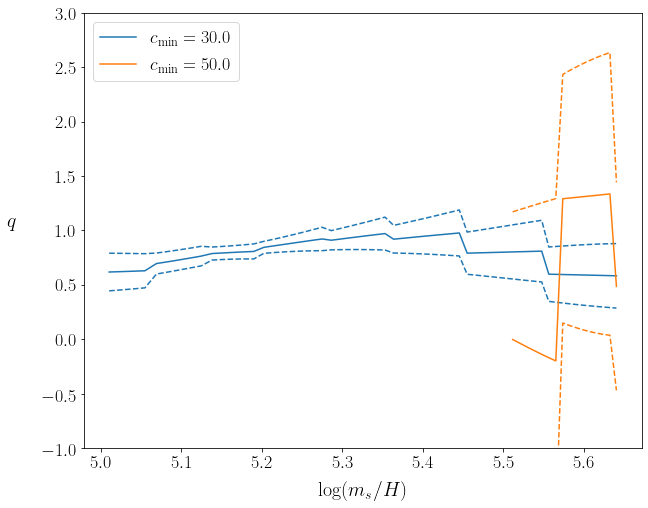

In [15]:
plt.clf()
plt.figure(figsize=(10,8))
cmap = plt.get_cmap("tab10")

cml = [30,50]

for iq in range(2):
    plt.plot(qt[iq].log,qt[iq].qbest,color=cmap(iq),label=r'$c_{\rm min} = %.1f$'%cml[iq])
    plt.plot(qt[iq].log,qt[iq].qbest+qt[iq].sigmaq,color=cmap(iq),linestyle='dashed')
    plt.plot(qt[iq].log,qt[iq].qbest-qt[iq].sigmaq,color=cmap(iq),linestyle='dashed')

plt.ylim([-1,3.0])

plt.tick_params(labelsize=18)
plt.xlabel(r'$\log(m_s/H)$',fontsize=20,labelpad=10)
plt.ylabel(r'$q$',fontsize=20,rotation=0,labelpad=30)
plt.legend(loc='upper left',fontsize=18)

For $c_{\rm min} = 50$, $q$ can be estimated only at times later than $\log \gtrsim 5.5$, since before that time there are not enough data points in the specified range $[c_{\rm min}H,c_{\rm max}m_s]$ (i.e. the hierarchy between $H$ and $m_s$ is not so large at early times). Furthermore, the estimated values of $q$ have large errors because of the lack of data points. It is possible to estimate $q$ at early times by reducing the value of $c_{\rm min}$ (or increasing the value of $c_{max}$), but it may also lead to a wrong result because the data might be affected by some feature at around the infrared peak.

One can check the results by comparing the data of $F$ and the best fit slope:

Text(0.5, 1.0, '$\\log(m_s/H) = 5.010228$')

<Figure size 432x288 with 0 Axes>

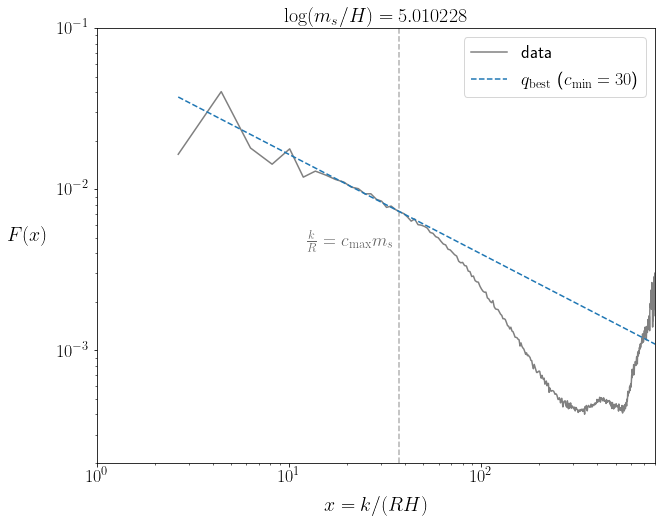

In [16]:
ind = 41

plt.clf()
plt.figure(figsize=(10,8))

xx = Ft.x[ind]
ff = Ft.F[ind]
plt.plot(xx,ff,label='data',color='gray')

xxx = np.linspace(math.log(xx[0]),math.log(xx[-1]),100)
plt.plot(np.exp(xxx),math.exp(qt[0].mbest[ind])/np.exp(xxx)**qt[0].qbest[ind],linestyle='dashed',label=r'$q_{\rm best}$ ($c_{\rm min} = 30$)')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,800)
plt.ylim(2e-4,1e-1)

plt.vlines(math.exp(Ft.log[ind])/4,plt.ylim()[0],plt.ylim()[1],linestyle='dashed',alpha=0.3)
plt.text(0.33*math.exp(Ft.log[ind])/4,math.sqrt(plt.ylim()[0]*plt.ylim()[1]),r'$\frac{k}{R}=c_{\rm max}m_s$',alpha=0.6,fontsize=18)

plt.xlabel(r'$x = k/(RH)$',fontsize=20,labelpad=10)
plt.ylabel(r'$F(x)$',fontsize=20,rotation=0,labelpad=30)
plt.tick_params(labelsize=18)
plt.legend(loc='upper right',fontsize=18)
plt.title('$\log(m_s/H) = %f$'%Ft.log[ind],fontsize=20)

Text(0.5, 1.0, '$\\log(m_s/H) = 5.590912$')

<Figure size 432x288 with 0 Axes>

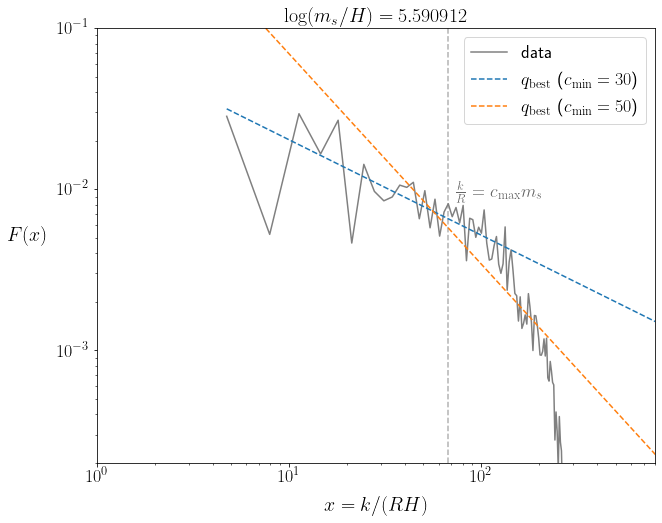

In [17]:
ind = 93

plt.clf()
plt.figure(figsize=(10,8))

xx = Ft.x[ind]
ff = Ft.F[ind]
plt.plot(xx,ff,label='data',color='gray')

xxx = np.linspace(math.log(xx[0]),math.log(xx[-1]),100)
plt.plot(np.exp(xxx),math.exp(qt[0].mbest[ind])/np.exp(xxx)**qt[0].qbest[ind],linestyle='dashed',label=r'$q_{\rm best}$ ($c_{\rm min} = 30$)')
plt.plot(np.exp(xxx),math.exp(qt[1].mbest[ind])/np.exp(xxx)**qt[1].qbest[ind],linestyle='dashed',label=r'$q_{\rm best}$ ($c_{\rm min} = 50$)')

plt.xscale('log')
plt.yscale('log')
plt.xlim(1,800)
plt.ylim(2e-4,1e-1)

plt.vlines(math.exp(Ft.log[ind])/4,plt.ylim()[0],plt.ylim()[1],linestyle='dashed',alpha=0.3)
plt.text(1.1*math.exp(Ft.log[ind])/4,2*math.sqrt(plt.ylim()[0]*plt.ylim()[1]),r'$\frac{k}{R}=c_{\rm max}m_s$',alpha=0.6,fontsize=18)

plt.xlabel(r'$x = k/(RH)$',fontsize=20,labelpad=10)
plt.ylabel(r'$F(x)$',fontsize=20,rotation=0,labelpad=30)
plt.tick_params(labelsize=18)
plt.legend(loc='upper right',fontsize=18)
plt.title('$\log(m_s/H) = %f$'%Ft.log[ind],fontsize=20)

## function aveq
We can take an average of $q$ over many realizations.
```python
def aveq(qlist):
    ...
    return [q,sigmaq,sigmaq/math.sqrt(Nreal),log]
```
Arguments:
- `qlist` list of scanq class object

It returns a list (size 4) whose components are  
0. average value of q as a function of time (1 dim. array)  
1. standard deviation (sigma) of q (1 dim. array)
2. sigma/sqrt(Nreal) where Nreal is the number of realizations (1 dim. array)
3. array for $\log(m_s/H)$ (1 dim. array)

In [18]:
# compute F for 8 realizations
Flist = []
for p in Plist:
    id = Plist.index(p)
    F = spe.calcF(p.P,p.log,p.t,p.k,p.k_below,verbose=False,p=2,sigma=0.1,usedata=True,fitp=PPlist[id])
    Flist.append(F)
    print('\rsimu %02d done'%id,end="")

simu 07 done

In [19]:
# estimate q for 8 realizations
qlist = []
for f in Flist:
    q = sp.scanq(f.x,f.F,f.log,30,verbose=False)
    qlist.append(q)
    print('\rsimu %02d done'%Flist.index(f),end="")

simu 07 done

In [20]:
# take an ensemble average
qa = sp.aveq(qlist)

<Figure size 432x288 with 0 Axes>

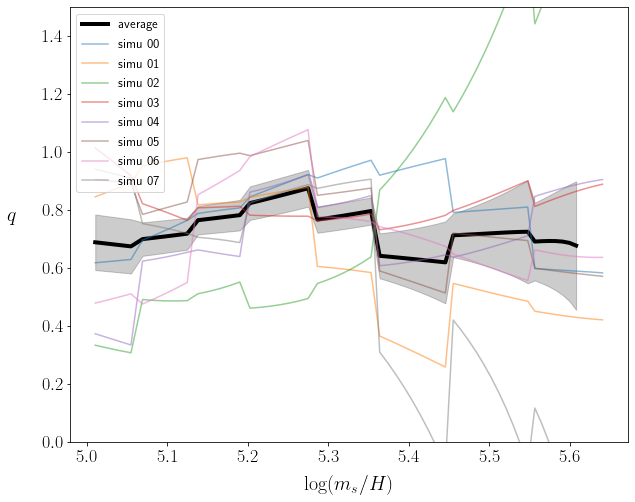

In [21]:
plt.clf()
plt.figure(figsize=(10,8))

plt.fill_between(qa[3],qa[0]-qa[2],qa[0]+qa[2],color='black',alpha=0.2)
plt.plot(qa[3],qa[0],color='black',linewidth=4,label='average')

for q in qlist:
    plt.plot(q.log,q.qbest,alpha=0.5,label=r'simu %02d'%qlist.index(q))
    
plt.ylim([0,1.5])

plt.tick_params(labelsize=18)
plt.xlabel(r'$\log(m_s/H)$',fontsize=20,labelpad=10)
plt.ylabel(r'$q$',fontsize=20,rotation=0,labelpad=30)
plt.legend(loc='upper left',fontsize=13)

Since these results are obtained from simulations with the box size 512^3 where the dynamical range is quite limited, the logarithmic growth of $q$ is not obvious. One has to perform simulations with larger box sizes (or larger hierarchy between two scales) in order to see such a trend.